<a href="https://colab.research.google.com/github/EmilianoCastelan/Simulacion1/blob/main/Prueba_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

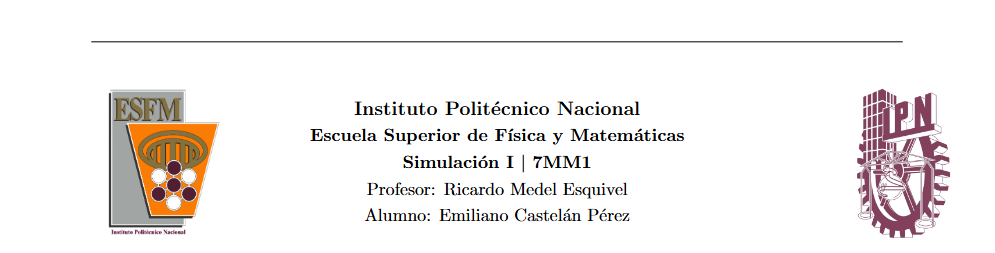

## Prueba de Kolmogorov-Smirnov

Con este método se busca comprobar si los números que tenemos en nuestra lista se comportan como si hubieran sido generados por una **distribución uniforme continua entre 0 y 1**

Este método es muy común cuando:
- Probamos generadores de números aleatorios
- Verificamos supuestos de uniformidad antes de hacer simulaciones
- Analizamos si ciertos datos parecen "completamente al azar" en el intervalo [0,1]

**¿Cómo funciona?**

1. La **función de distribución acumulada empírica** (Fn): lo que realmente observamos en nuestros datos ordenados.
2. La **función de distribución acumulada teórica** (F): la que tendría una distribución Uniforme(0,1), que simplemente es F(x) = x.

Luego mide cuál es la **mayor diferencia vertical** entre ambas funciones.  
A esa diferencia máxima se le llama **estadístico D**.

In [7]:
import numpy as np
import random as ran
import statistics as st
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
lista_num = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

In [ ]:
data = np.sort(np.array(lista_num))
n = len(data)

Fn = np.arange(1, n+1) / n

F = data

d_plus = Fn - F

Fn_prev = np.zeros(n)
Fn_prev[0] = 0
Fn_prev[1:] = Fn[:-1]

d_minus = F - Fn_prev

difs = np.concatenate([np.abs(d_plus), np.abs(d_minus)])

D = np.max(difs)
print("D calculado manualmente:", D)

# Utilizando scipy
ks, p = stats.kstest(data, 'uniform', args=(0,1))
print("D de scipy:", ks)
print("Valor de p:", p)

# Tabla de resultados
tabla = pd.DataFrame({
    'x': data,
    'Fn': Fn,
    'F': F,
    'd+': d_plus,
    'd-': d_minus,
    'abs_d+': np.abs(d_plus),
    'abs_d-': np.abs(d_minus)
})

print("\nTabla :")
print(tabla.round(4))

print("\n")

if p < 0.05:
    print("p < 0.05 → Se rechaza H0, NO parece uniforme(0,1)")
else:
    print("p >= 0.05 → No se rechaza, puede ser uniforme")

D calculado manualmente: 0.056420000000000026
D de scipy: 0.056420000000000026
Valor de p: 0.8898658687200723

Tabla :
         x    Fn       F      d+      d-  abs_d+  abs_d-
0   0.0012  0.01  0.0012  0.0088  0.0012  0.0088  0.0012
1   0.0319  0.02  0.0319 -0.0119  0.0218  0.0119  0.0218
2   0.0327  0.03  0.0327 -0.0027  0.0127  0.0027  0.0127
3   0.0501  0.04  0.0501 -0.0101  0.0201  0.0101  0.0201
4   0.0523  0.05  0.0523 -0.0023  0.0123  0.0023  0.0123
..     ...   ...     ...     ...     ...     ...     ...
95  0.9083  0.96  0.9083  0.0517 -0.0417  0.0517  0.0417
96  0.9151  0.97  0.9151  0.0549 -0.0449  0.0549  0.0449
97  0.9366  0.98  0.9366  0.0434 -0.0334  0.0434  0.0334
98  0.9419  0.99  0.9419  0.0481 -0.0381  0.0481  0.0381
99  0.9861  1.00  0.9861  0.0139 -0.0039  0.0139  0.0039

[100 rows x 7 columns]


p >= 0.05 → No se rechaza, puede ser uniforme


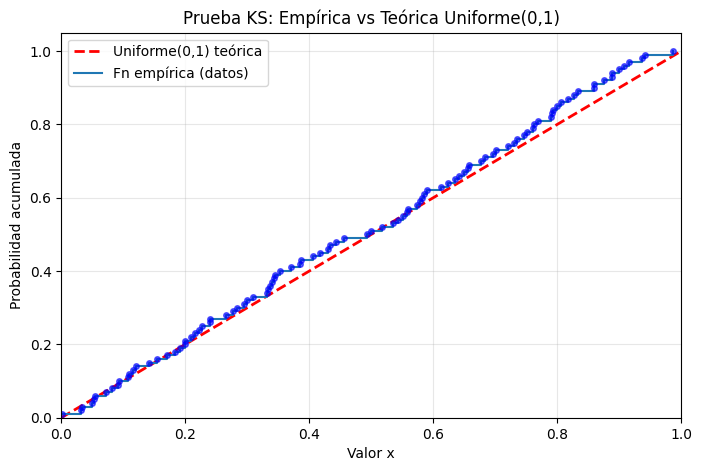

In [9]:
plt.figure(figsize=(8, 5))

# Función teórica
x = np.linspace(0, 1, 1000)
plt.plot(x, x, 'r--', lw=2, label='Uniforme(0,1) teórica')

# Función empírica
plt.step(data, Fn, where='post', lw=1.5, label='Fn empírica (datos)')

plt.plot(data, Fn, 'o', ms=4, color='blue', alpha=0.6)

plt.xlabel('Valor x')
plt.ylabel('Probabilidad acumulada')
plt.title('Prueba KS: Empírica vs Teórica Uniforme(0,1)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()